In [1]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
#from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# See what the data looks like in the station table
inspector = inspect(engine)
# Using the inspector to print the column names within the station table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Using the inspector to print the column names within the table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Use `engine.execute` to select and display the first 10 rows from the station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Climate Analysis

In [14]:
####max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#max_date = session.query(func.max(Measurement.date)).scalar()
#year_date = dt.strptime(max_date, "%Y-%m-%d") - timedelta(days=366)

####date_12_months_ago = dt.strftime(my_string, "%Y-%m-%d")
####date_12_months_ago2 = dt.date(2017, 8, 26) - dt.timedelta(days=365)
####date_12_months_ago2 = (date_12_months_ago.year) -1
####date_12_months_ago2
####year_date
##max_date

In [15]:
# Get last date in the Measurement dataset
##max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date = session.query(func.max(Measurement.date)).scalar()
print(max_date)

2017-08-23


In [16]:
# Calculate the date 1 year ago from the last data point in the database
one_year_prior_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_prior_date)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
# Some dates have no results so filtering those out
##last_12_months_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior_date).\
##    filter(Measurement.prcp != "None").order_by(Measurement.date).all()
last_12_months_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior_date).\
    order_by(Measurement.date).all()
last_12_months_prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [18]:
# Save the query results as a Pandas DataFrame
last_12_month_prcp_df = pd.DataFrame(last_12_months_prcp)

#last_12_month_prcp_df = last_12_month_prcp_df.set_index("date")
last_12_month_prcp_df.head()

# Sort the dataframe by date
last_12_month_prcp_df.sort_values("date")
last_12_month_prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [19]:
# Set the index to the date column
last_12_month_prec_df = last_12_month_prcp_df.set_index('date')
 
# Sort the dataframe by date
last_12_month_prec_df.sort_values("date")
last_12_month_prec_df.head()

#last_12_month_prec_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


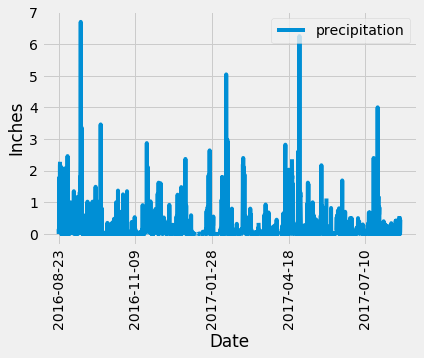

In [20]:
last_12_month_prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"], loc="upper right")
plt.xticks(rotation=90)

plt.show()

In [ ]:
##Skip this one

# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
max_date = session.query(func.max(Measurement.date)).scalar()
##max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(max_date)

# Calculate the date 1 year ago from the last data point in the database
one_year_prior_date = dt.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
last_12_months_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior_date).\
    filter(Measurement.prcp != "None").order_by(Measurement.date).all()
#last_12_months_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_month_prcp_df = pd.DataFrame(last_12_months_prcp, columns=['date', 'prcp'])
#last_12_month_prcp_df["date"] = last_12_month_prcp_df["date"].astype(str)
##last_12_month_prcp_df.dtypes
#last_12_month_prcp_df = last_12_month_prcp_df['date'].dt.datetime.strftime("%Y-%m-%d")
last_12_month_prcp_df.set_index("date", inplace=True,)
#last_12_month_prcp_df

# Sort the dataframe by date
last_12_month_prcp_df.sort_values("date")
last_12_month_prcp_df


In [ ]:
## Skip this one

dates = last_12_month_prcp_df.index.unique()
inches = last_12_month_prcp_df['prcp']

plt.plot(dates, inches)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"], loc="upper right")
plt.xticks(rotation=90)

plt.show()

In [ ]:
## Skip this one

# Use Pandas Plotting with Matplotlib to plot the data
#fig, ax = plt.subplots()
#ypos = range(1, len(prcp)+1)
###ax.barh(ypos, scores[::-1])
#ax.set_xlabel("Date")
#ax.set_ylabel("Inches")
#ax.set_yticks(ypos)
#ax.set_yticklabels(emoji_id[::-1])
#ax.set_title("Emoji Scores")
#fig.tight_layout()
#plt.show()

dates = last_12_month_prcp_df["date"]
inches = last_12_month_prcp_df['prcp']
x_axis = dates                         #x_axis = np.arange(len('inches'))
y_axis = inches

plt.bar(x_axis, y_axis, color="mediumpurple", align="center")

plt.set_ticks(40)

# Add the Title, x axis and y axis labels
#plt.xlabel("Dates") 
plt.ylabel("Inches") 
plt.title("Precipitation Over One Year") 

# Create the ticks for our bar chart's x axis
#tick_locations= [value for value in x_axis]
#plt.xticks(tick_locations, dates, rotation=45, ha="right")

# Set the limits of the x axis and the y axis
#plt.xlim(0, len(x_axis)-0.25)
#plt.ylim(0, max(inches)+ 0.5)

plt.show()

In [ ]:
## Skip this one

dates = last_12_month_prcp_df.index.values
inches = last_12_month_prcp_df['prcp']
  
# Figure Size 
fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
plt.bar(dates, inches) 

#number_of_steps = 9
#l = np.arange(one_year_prior_date, max_date, number_of_steps)

#ax.set(xticks=l, xticklabels=l)
  
# Show Plot 
plt.show() 



#max_value = original_df['AGE'].max()
#min_value = original_df['AGE'].min()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_month_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
available_stations_count = session.query(func.count(Station.station)).scalar()

## Or could do this one
##active_stations = session.query(Measurement).group_by(Measurement.station).count()
##active_stations

print(f"There are {available_stations_count} available stations in this dataset.")

There are 9 available stations in this dataset.


In [76]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.station)]
active_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

print(f"The most active station is {active_stations[0][0]}")
active_stations

The most active station is USC00519281


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
top_station = session.query(*sel).\
    group_by(Measurement.station).\
    filter(Measurement.station == active_stations[0][0]).all()
    #order_by(func.count(Measurement.station).desc()).all()

print(f"The lowest recorded temperature for station {active_stations[0][0]} is {top_station[0][1]} F." )
print(f"The highest recorded temperature for station {active_stations[0][0]} is {top_station[0][2]} F." )
print(f"The average temperature for station {active_stations[0][0]} is {top_station[0][3]:.1f} F." )

The lowest recorded temperature for station USC00519281 is 54.0 F
The highest recorded temperature for station USC00519281 is 85.0 F
The average temperature for station USC00519281 is 71.7 F


In [80]:
top_active_station = active_stations[0][0]
top_active_station

'USC00519281'

In [84]:
# Choose the station with the highest number of temperature observations.
##top_active_station = active_stations[0][0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_year = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_prior_date).\
    filter(Measurement.station == top_active_station).\
    order_by(Measurement.date).all()

top_station_year
    


[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Strip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
